Binary Traffic Sign Classification


In [69]:
import os
import cv2
from time import time
import numpy as np
from sklearn.utils import shuffle

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 6]

In [70]:
folder = 'subset_homework'

In [71]:
# Load traffic sign class 0
fnames_0 = os.listdir(os.path.join(folder, 'class_id_0'))
images_0 = [cv2.imread(os.path.join(folder, 'class_id_0', f), cv2.IMREAD_UNCHANGED) for f in fnames_0]
labels_0 = [0] * len(images_0)
print(len(labels_0))

2220


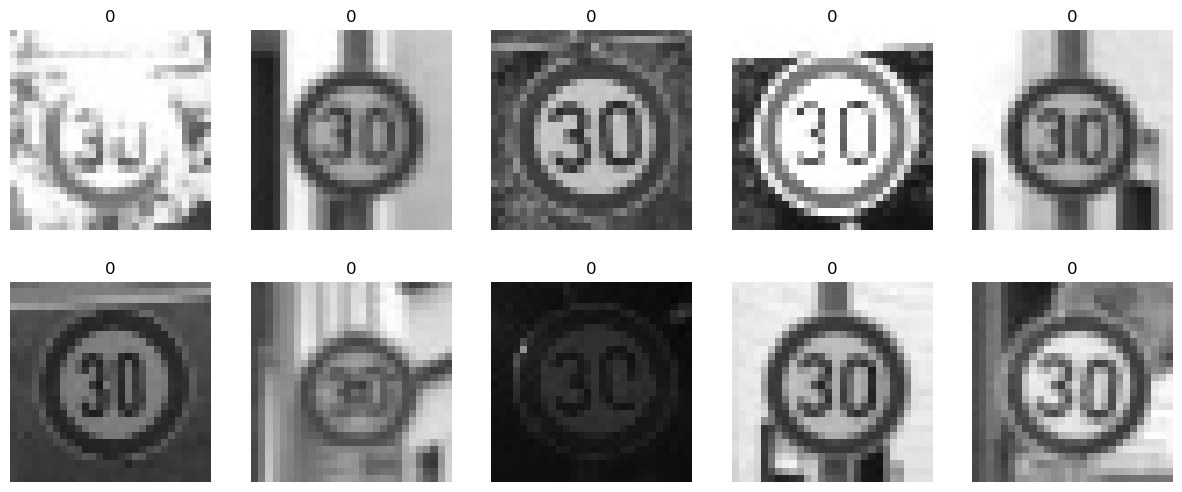

In [72]:
for cnt, idx in enumerate(np.random.randint(0, len(images_0), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_0[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_0[idx]), plt.axis(False)

Num samples class_0 2220
Num samples class_1 2250


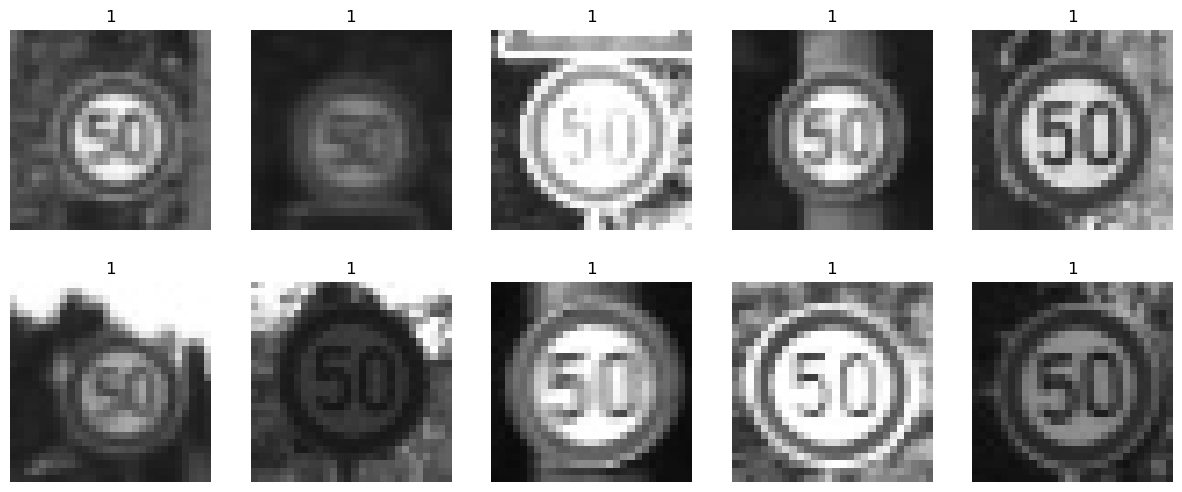

In [73]:
# Load traffic sign class 1
fnames_1 = os.listdir(os.path.join(folder, 'class_id_1'))
images_1 = [cv2.imread(os.path.join(folder, 'class_id_1', f), cv2.IMREAD_UNCHANGED) for f in fnames_1]
labels_1 = [1] * len(images_1)

for cnt, idx in enumerate(np.random.randint(0, len(images_1), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_1[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_1[idx]), plt.axis(False)

print('Num samples class_0', len(images_0))
print('Num samples class_1', len(images_1))

The number of class 0 representers is 2220
The number of class 1 representers is 2250
The number of each class samples is almost equal. The dataset is balanced.

In [74]:
# Put both classes together and shuffle the data
images = images_0 + images_1
labels = labels_0 + labels_1
images, labels = shuffle(images, labels)

images = np.array(images)
labels = np.array(labels)

print('Images', images.shape)
print('Labels', labels.shape)


Images (4470, 28, 28)
Labels (4470,)


In [75]:
for image in images:
    pixels = np.array([image.flatten() for image in images])/255
print('Shape', pixels.shape)

Shape (4470, 784)


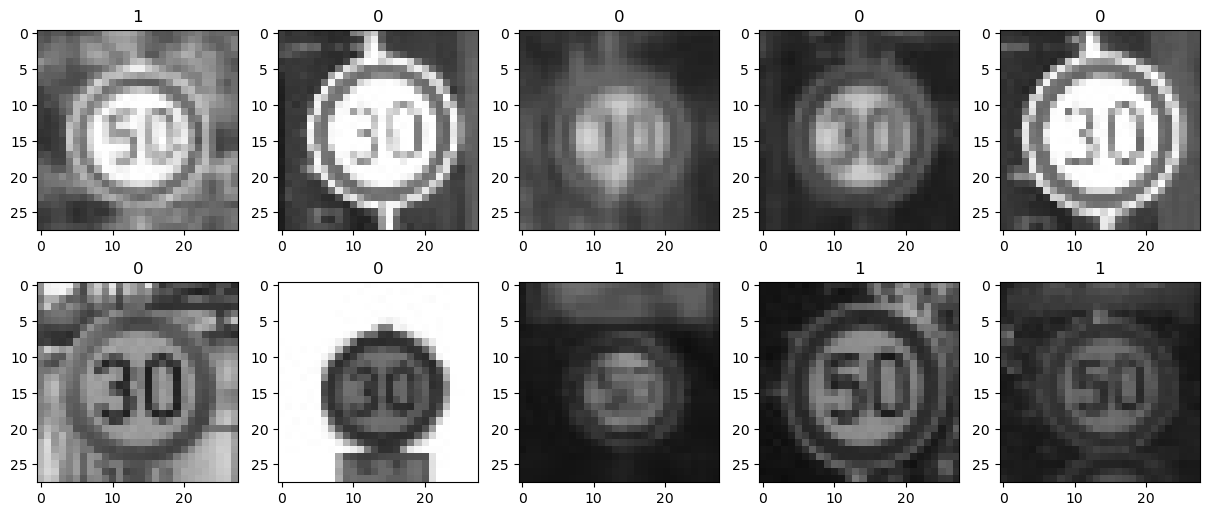

In [76]:
for cnt, idx in enumerate(np.random.randint(0, len(images), 10)):    
    plt.subplot(2,5,cnt+1)
    plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels[idx])


In [77]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input


The try with a simple model with one layer of one neuron.

In [78]:
inputs = Input(shape=(pixels.shape[1]))
outputs = Dense(1, activation="linear")(inputs)
model = Model(inputs, outputs)

model.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_28 (Dense)            (None, 1)                 785       
                                                                 
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________


Epoch 1/20
140/140 [==============================] - 1s 2ms/step - loss: 0.2929
Epoch 2/20
140/140 [==============================] - 0s 2ms/step - loss: 0.2157
Epoch 3/20
140/140 [==============================] - 0s 2ms/step - loss: 0.1780
Epoch 4/20
140/140 [==============================] - 0s 2ms/step - loss: 0.1512
Epoch 5/20
140/140 [==============================] - 0s 2ms/step - loss: 0.1340
Epoch 6/20
140/140 [==============================] - 0s 2ms/step - loss: 0.1194
Epoch 7/20
140/140 [==============================] - 0s 2ms/step - loss: 0.1145
Epoch 8/20
140/140 [==============================] - 0s 2ms/step - loss: 0.1048
Epoch 9/20
140/140 [==============================] - 0s 2ms/step - loss: 0.0988
Epoch 10/20
140/140 [==============================] - 0s 2ms/step - loss: 0.0977
Epoch 11/20
140/140 [==============================] - 0s 2ms/step - loss: 0.0935
Epoch 12/20
140/140 [==============================] - 0s 2ms/step - loss: 0.0916
Epoch 13/20
140/140 [====

(Text(0.5, 0, 'epoch'), Text(0, 0.5, 'loss'))

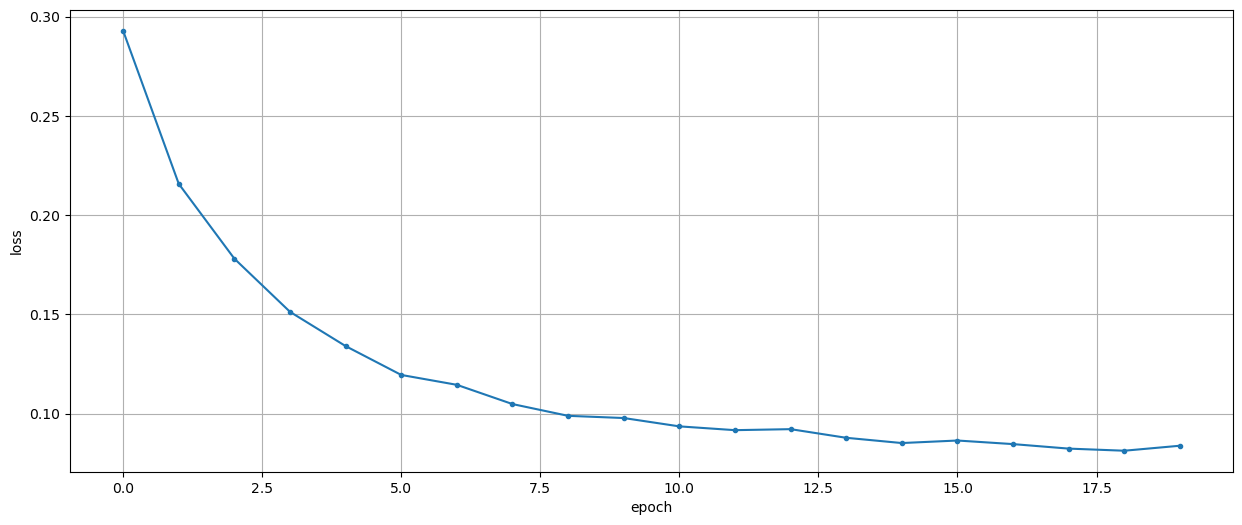

In [79]:
#tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)


model.compile(optimizer ='adam', loss = 'mean_squared_error')


history = model.fit(pixels, labels, epochs=20, batch_size=32)

#Plot training history
h = history.history
epochs = range(len(h['loss']))
plt.plot(epochs, h['loss'], '.-'), plt.grid(True)
plt.xlabel('epoch'), plt.ylabel('loss')



[0.52138126] [0.52138126]


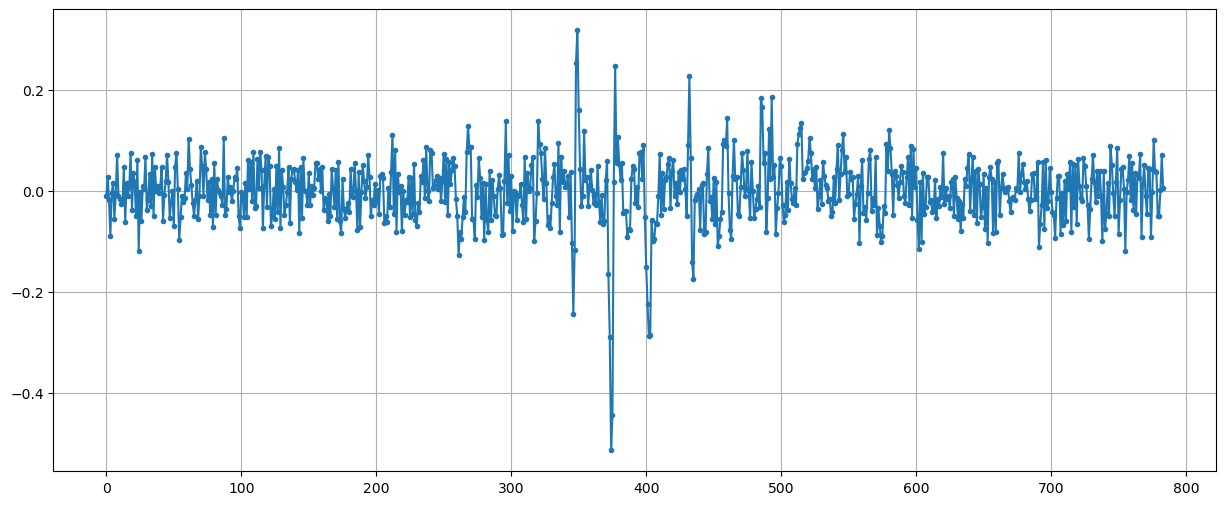

In [80]:
# Let's also have a looks at the learnt weights
plt.plot(model.layers[1].weights[0].numpy(), '.-'), plt.grid(True)
print(model.layers[1].weights[1].numpy(), model.layers[1].bias.numpy())

In [81]:
idx = 19
pred = model.predict(pixels[idx:idx+1, ...])
print(pred, labels[idx])

# Run it on the entire dataset
predictions = model.predict(pixels).squeeze()
predictions = predictions > 0.5

correct = 0
for prediction, label in zip(predictions, labels):
    if prediction == label:
        correct = correct + 1

print('Accuracy', correct/len(labels))

1/1 [==============================] - 0s 49ms/step
[[0.18392065]] 0
140/140 [==============================] - 0s 1ms/step
Accuracy 0.9561521252796421


In [82]:
print(predictions[idx])
print(idx)

False
19


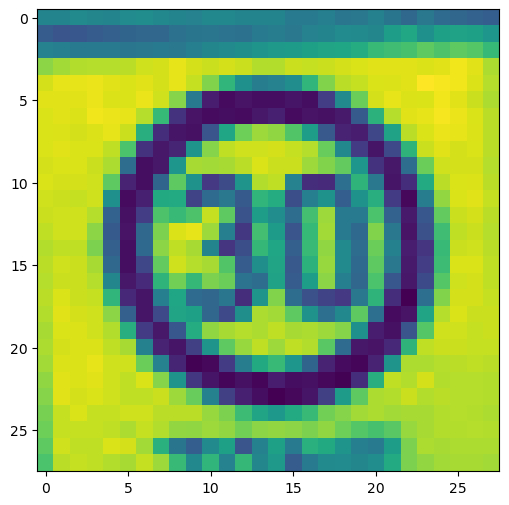

In [83]:
plt.imshow(images[idx]/255)

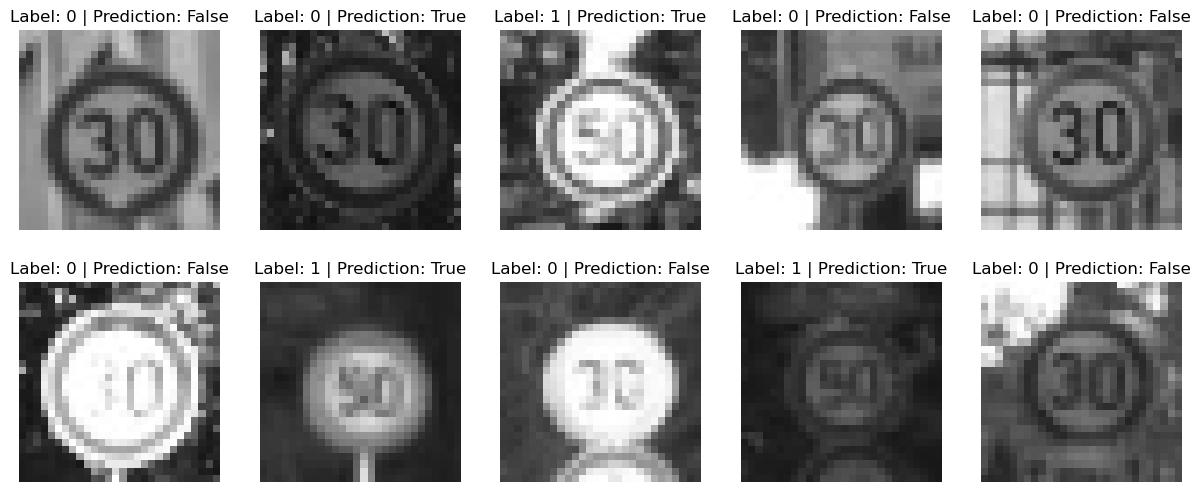

In [84]:
for cnt, idx in enumerate(np.random.randint(0, len(images), 10)): 
    plt.subplot(2,5,cnt+1), plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title('Label: ' + str(labels[idx]) + ' | Prediction: ' + str(predictions[idx]))
    plt.axis(False)


The try with more complicated model.

In [85]:
inputs = Input(shape=(pixels.shape[1]))
hidden_1 = Dense(12, activation="linear")(inputs)
hidden_2 = Dense(10, activation="relu")(hidden_1)
outputs = Dense(1, activation="relu")(hidden_2)
model_2 = Model(inputs, outputs)

model_2.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_29 (Dense)            (None, 12)                9420      
                                                                 
 dense_30 (Dense)            (None, 10)                130       
                                                                 
 dense_31 (Dense)            (None, 1)                 11        
                                                                 
Total params: 9,561
Trainable params: 9,561
Non-trainable params: 0
_________________________________________________________________


Epoch 1/20
140/140 [==============================] - 1s 2ms/step - loss: 0.0529
Epoch 2/20
140/140 [==============================] - 0s 2ms/step - loss: 0.0541
Epoch 3/20
140/140 [==============================] - 0s 2ms/step - loss: 0.0511
Epoch 4/20
140/140 [==============================] - 0s 2ms/step - loss: 0.0410
Epoch 5/20
140/140 [==============================] - 0s 2ms/step - loss: 0.0436
Epoch 6/20
140/140 [==============================] - 0s 2ms/step - loss: 0.0435
Epoch 7/20
140/140 [==============================] - 0s 2ms/step - loss: 0.0391
Epoch 8/20
140/140 [==============================] - 0s 2ms/step - loss: 0.0395
Epoch 9/20
140/140 [==============================] - 0s 2ms/step - loss: 0.0402
Epoch 10/20
140/140 [==============================] - 0s 2ms/step - loss: 0.0379
Epoch 11/20
140/140 [==============================] - 0s 2ms/step - loss: 0.0333
Epoch 12/20
140/140 [==============================] - 0s 2ms/step - loss: 0.0334
Epoch 13/20
140/140 [====

(Text(0.5, 0, 'epoch'), Text(0, 0.5, 'loss'))

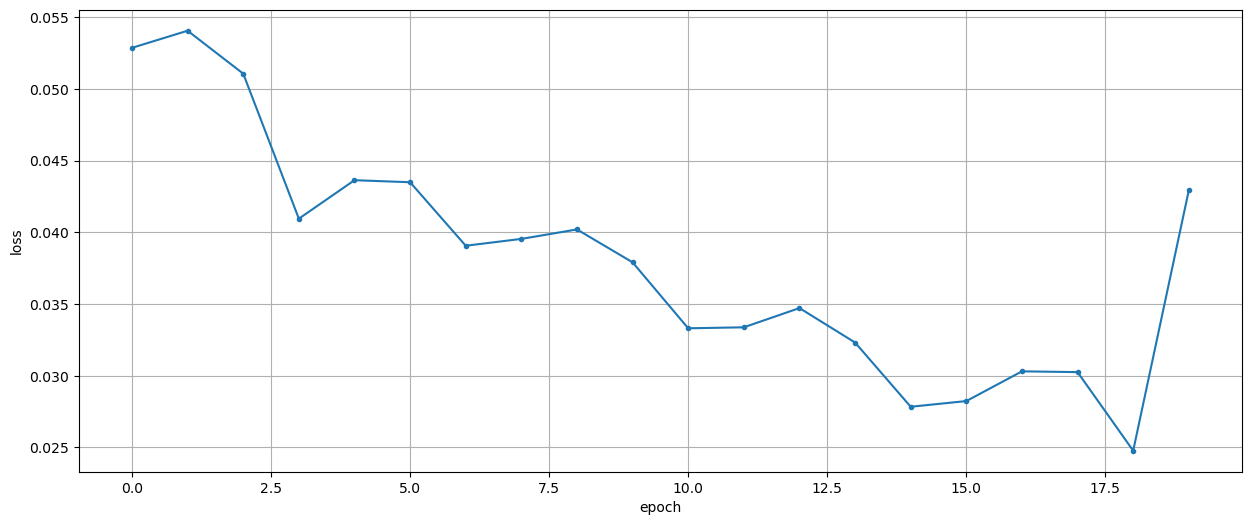

In [88]:
#tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)


model_2.compile(optimizer ='adam', loss = 'mean_squared_error')


history = model_2.fit(pixels, labels, epochs=20, batch_size=32)

#Plot training history
h = history.history
epochs = range(len(h['loss']))
plt.plot(epochs, h['loss'], '.-'), plt.grid(True)
plt.xlabel('epoch'), plt.ylabel('loss')


In [89]:
idx = 19
pred = model_2.predict(pixels[idx:idx+1, ...])
print(pred, labels[idx])

# Run it on the entire dataset
predictions = model_2.predict(pixels).squeeze()
predictions = predictions > 0.5

correct = 0
for prediction, label in zip(predictions, labels):
    if prediction == label:
        correct = correct + 1

print('Accuracy', correct/len(labels))

1/1 [==============================] - 0s 73ms/step
[[0.]] 0
140/140 [==============================] - 0s 1ms/step
Accuracy 0.978523489932886


False
19


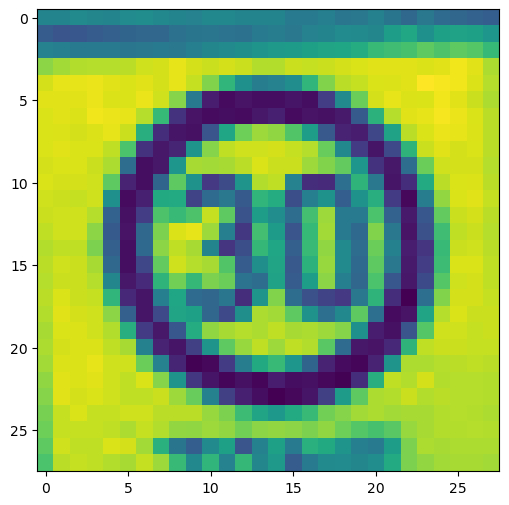

In [90]:
print(predictions[idx])
print(idx)
plt.imshow(images[idx]/255)

Conclusions.
The accuracy of both models is high. However the model with several layers shows the slightly higher accuracy: **0.9561521252796421** vs **0.978523489932886**. It was interesting to notice that the type of activation function impacts the accuracy rate. When I set all the layers with the activation relu, the accuracy was much more lower: 0.4966442953020134. In other configurations of linear and relu functions the result was also lower but not drastically. The configurations of activation function that I left gave me the highest accuracy.